In [1]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ProjectDataRevised.csv')
df.columns = ['chirps', 'temperature']
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chirps       58 non-null     float64
 1   temperature  58 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


(59, 2)

In [3]:
df.head()

,chirps,temperature
0,44.0,80.5
1,46.4,78.5
2,43.6,78.0
3,35.0,73.5
4,35.0,70.5


In [4]:
df.isnull().sum()

chirps         1
temperature    1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 58
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chirps       57 non-null     float64
 1   temperature  57 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [7]:
df.describe()

,chirps,temperature
count,57.000000,57.000000
mean,34.566404,64.793860
std,44.864854,11.246539
min,12.500000,6.000000
25%,22.500000,60.000000
50%,29.500000,66.500000
75%,35.000000,72.000000
max,361.000000,80.500000


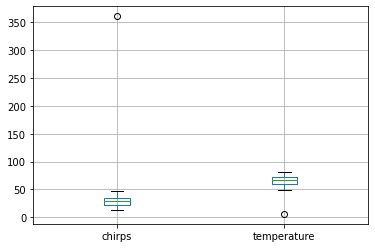

In [8]:
boxplot = df.boxplot()

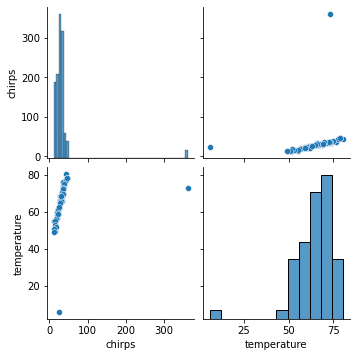

In [9]:
sns.pairplot(df)

In [10]:
chirpsArray = df['chirps'].to_numpy()


In [11]:
tempArray = df['temperature'].to_numpy()

In [12]:
outliers =[]
noOutliers = []

def findOutliers(array):
    Q3 = np.quantile(array, 0.75)
    Q1 = np.quantile(array, 0.25)
    IQR = Q3 - Q1

    bottom = Q1 - (1.5 * IQR)
    top = Q3 + (1.5 * IQR)


    print("This is the bottom: ", bottom)
    print("This is the top: ", top)
    print("Q3: ", Q3)
    print("Q1: ", Q1)
    print("IQR: ", IQR)

    for i in array:
        if (i > bottom) & (i < top):
            noOutliers.append(i)
        else:
            outliers.append(i)

    print("The outliers, if any, were: ", outliers)
    
    

find chirp outliers

In [13]:
findOutliers(chirpsArray)

This is the bottom:  3.75
This is the top:  53.75
Q3:  35.0
Q1:  22.5
IQR:  12.5
The outliers, if any, were:  [361.0]


find temp outliers

In [14]:
findOutliers(tempArray)

This is the bottom:  42.0
This is the top:  90.0
Q3:  72.0
Q1:  60.0
IQR:  12.0
The outliers, if any, were:  [361.0, 6.0]


remove outliers

In [15]:
df = df[df.chirps < 361]
df = df[df.temperature > 6]

In [16]:
df.describe()

,chirps,temperature
count,55.000000,55.000000
mean,28.805182,65.713636
std,8.865180,8.065188
min,12.500000,49.250000
25%,22.375000,60.500000
50%,29.500000,66.500000
75%,35.000000,71.500000
max,46.400000,80.500000


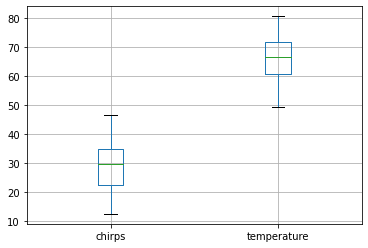

In [17]:
boxplot = df.boxplot()

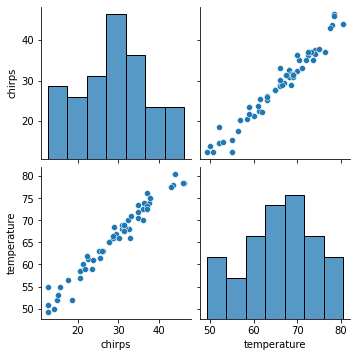

In [18]:
sns.pairplot(df)

In [19]:
df.to_csv('processedData.csv')